# 1. Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report

# 2. Load Dataset

In [6]:
df= pd.read_csv("D:/DSBDA/COMP_DSBDAL_MOCK/IRIS.csv") 

In [7]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [10]:
X = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
y = df['species']

In [13]:
# Encode species labels into numeric values
le = LabelEncoder()
y = le.fit_transform(y)

# 3. Exploratory Data Analysis (EDA)

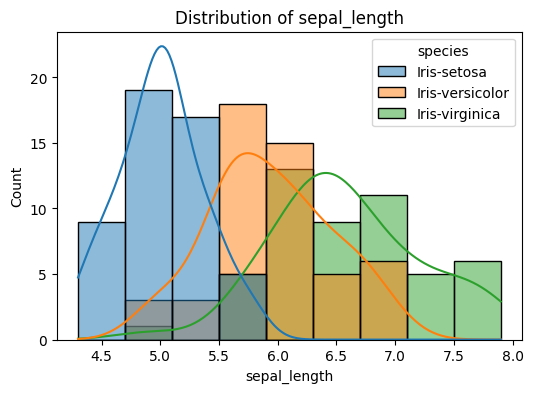

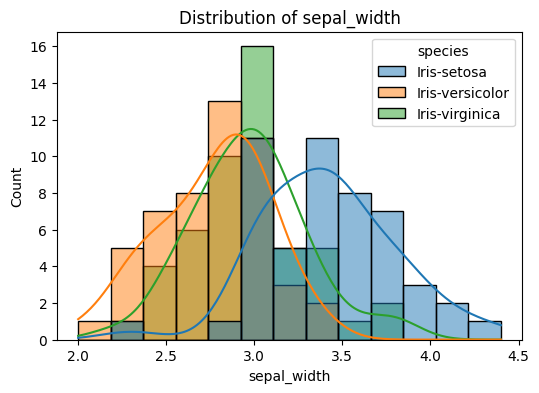

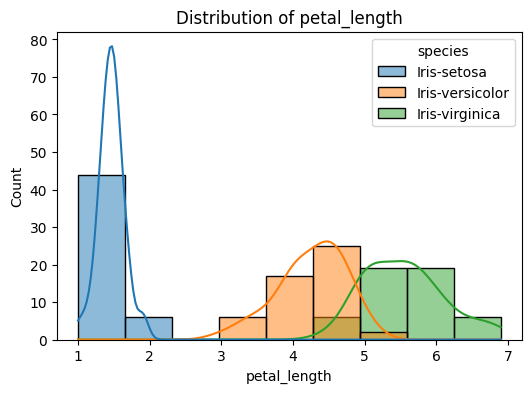

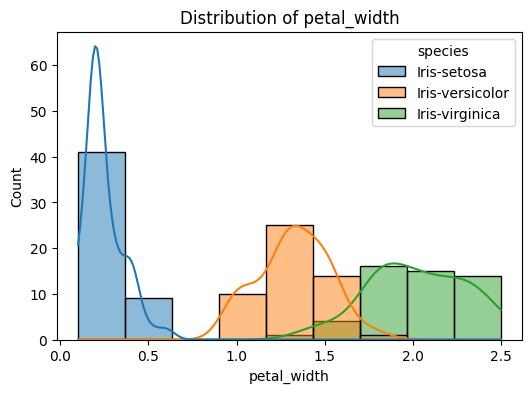

In [14]:
# Histograms for each feature
for col in X.columns:
    plt.figure(figsize=(6,4))
    sns.histplot(data=df, x=col, hue='species', kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

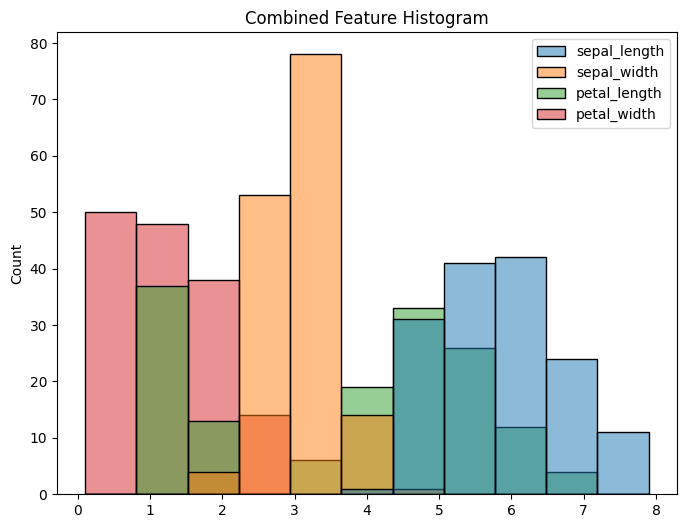

In [15]:
# Combined Histogram (all features)
plt.figure(figsize=(8,6))
sns.histplot(data=df)
plt.title('Combined Feature Histogram')
plt.show()

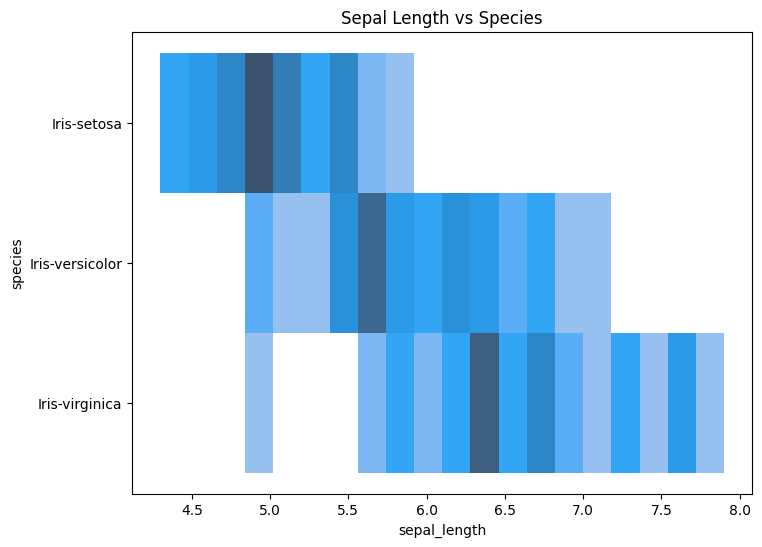

In [16]:
# Feature vs Species (histogram)
plt.figure(figsize=(8,6))
sns.histplot(x='sepal_length', y='species', data=df, bins=20)
plt.title('Sepal Length vs Species')
plt.show()

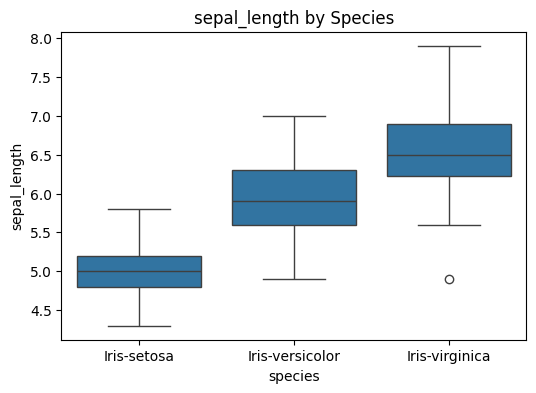

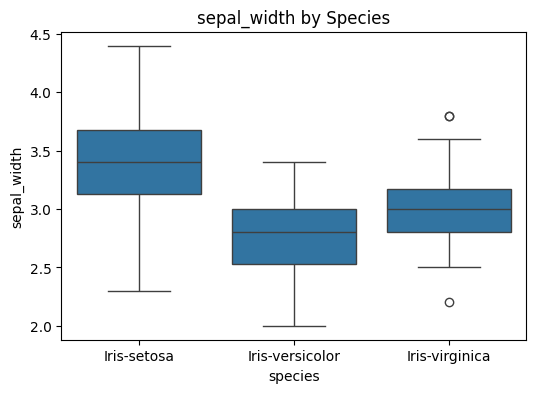

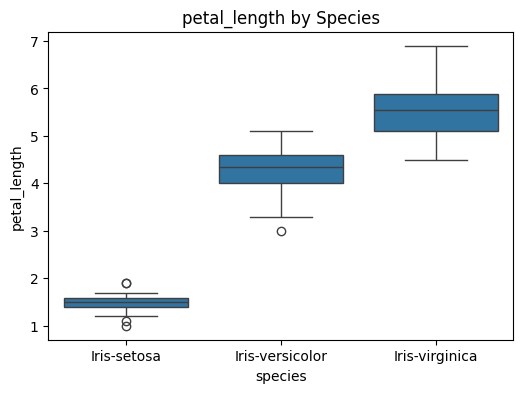

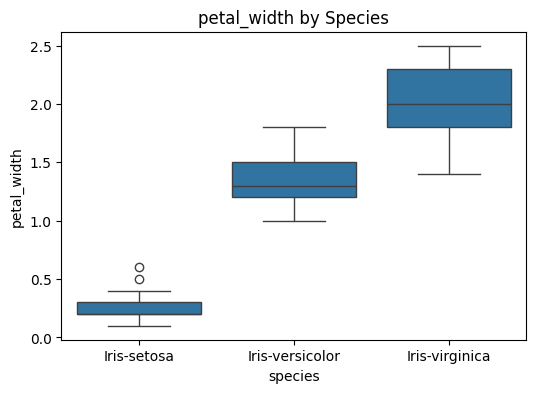

In [19]:
# Boxplots for each feature
for col in X.columns:
    plt.figure(figsize=(6,4))
    sns.boxplot(data=df, x='species', y=col)
    plt.title(f'{col} by Species')
    plt.show()


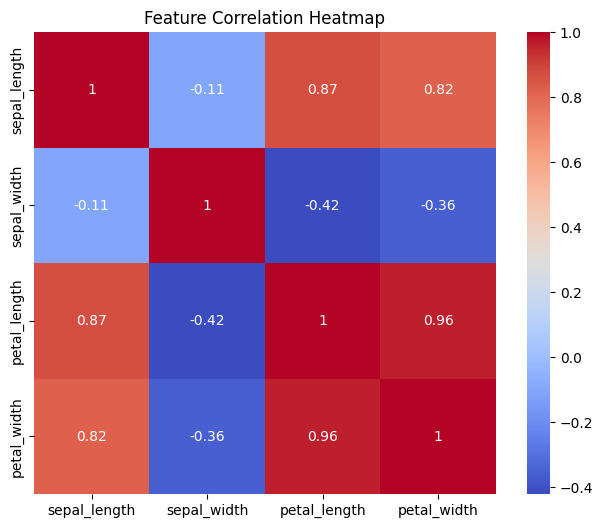

In [20]:
# Heatmap for feature correlations
plt.figure(figsize=(8,6))
sns.heatmap(X.corr(), annot=True, cmap='coolwarm', square=True)
plt.title('Feature Correlation Heatmap')
plt.show()

In [21]:
# Outlier Detection for 'sepal_width'
sw = df[['sepal_width', 'species']]

In [22]:
Q1 = sw['sepal_width'].quantile(0.25)
Q3 = sw['sepal_width'].quantile(0.75)
IQR = Q3 - Q1

In [23]:
LB = Q1 - 1.5 * IQR
UB = Q3 + 1.5 * IQR

In [24]:
print(f"\nOutlier Boundaries for sepal_width: LB={LB}, UB={UB}")
outliers = sw[(sw['sepal_width'] < LB) | (sw['sepal_width'] > UB)]
print("\nDetected Outliers in sepal_width:")
print(outliers)


Outlier Boundaries for sepal_width: LB=2.05, UB=4.05

Detected Outliers in sepal_width:
    sepal_width          species
15          4.4      Iris-setosa
32          4.1      Iris-setosa
33          4.2      Iris-setosa
60          2.0  Iris-versicolor


# 4. Feature Importance Discussion ---
- Based on the correlation heatmap and boxplots:
- Petal Length and Petal Width have strong correlations with species classification.
- Sepal Length and Sepal Width show weaker patterns.
- Therefore, petal measurements are the most important features.

In [25]:
# Display the feature correlations again for final proof
feature_correlation = X.corr()
print("\nFeature Correlation Matrix:\n", feature_correlation)


Feature Correlation Matrix:
               sepal_length  sepal_width  petal_length  petal_width
sepal_length      1.000000    -0.109369      0.871754     0.817954
sepal_width      -0.109369     1.000000     -0.420516    -0.356544
petal_length      0.871754    -0.420516      1.000000     0.962757
petal_width       0.817954    -0.356544      0.962757     1.000000


# 5. Data Preprocessing

In [27]:
# Scaling Features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [28]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=99)

# 6. Model Training & Evaluation (Multiple Models)

In [30]:
models = {
    "Gaussian Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(random_state=99),
    "Support Vector Machine": SVC(random_state=99)
}

In [31]:
results = {}


--- Gaussian Naive Bayes ---
Accuracy: 0.95
Precision: 0.95
Recall: 0.95


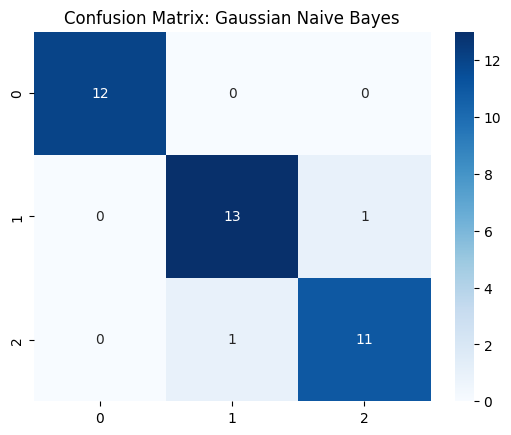


--- Decision Tree ---
Accuracy: 0.95
Precision: 0.95
Recall: 0.95


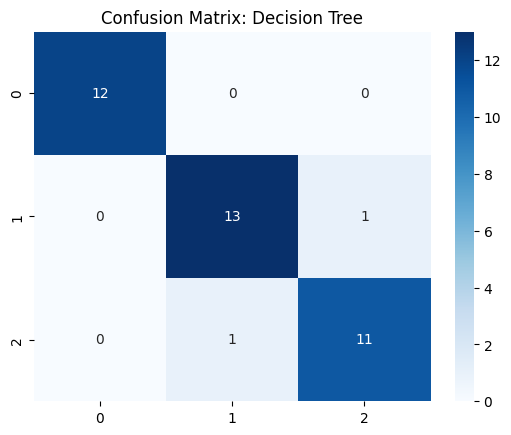


--- Support Vector Machine ---
Accuracy: 0.95
Precision: 0.95
Recall: 0.95


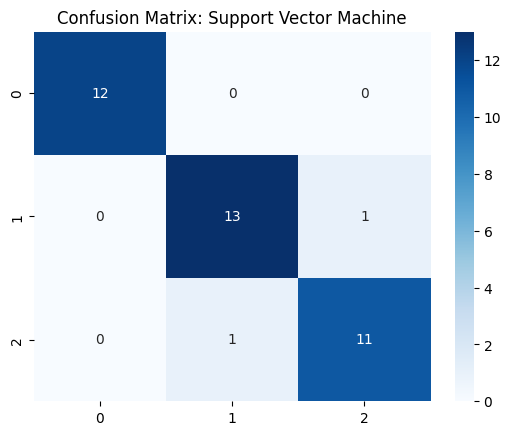

In [33]:
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='macro')
    rec = recall_score(y_test, y_pred, average='macro')
    
    results[model_name] = {
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "Confusion Matrix": confusion_matrix(y_test, y_pred),
        "Classification Report": classification_report(y_test, y_pred, output_dict=True)
    }
    
    print(f"\n--- {model_name} ---")
    print(f"Accuracy: {acc:.2f}")
    print(f"Precision: {prec:.2f}")
    print(f"Recall: {rec:.2f}")
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix: {model_name}')
    plt.show()


    

# 7. New Data Predictions (using best model)

In [35]:
# Selecting SVM manually based on likely best performance
best_model = SVC(random_state=99)
best_model.fit(X_train, y_train)

SVC(random_state=99)

In [36]:
new_data = [[5.0, 3.2, 1.2, 0.2], [6.2, 2.9, 4.3, 1.3], [6.8, 3.0, 5.5, 2.1]]
new_data_scaled = scaler.transform(new_data)
new_preds = best_model.predict(new_data_scaled)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [37]:
print("\nNew Data Predictions:", new_preds)


New Data Predictions: [0 1 2]


In [38]:
# Decode label to species name
predicted_species = le.inverse_transform(new_preds)
print("Predicted species:", predicted_species)

Predicted species: ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']
